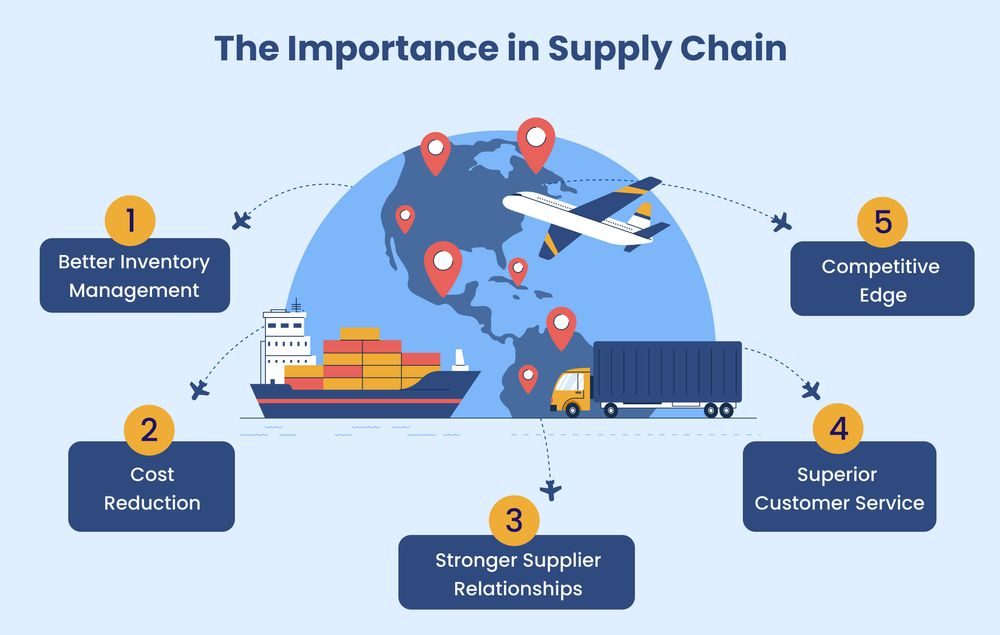

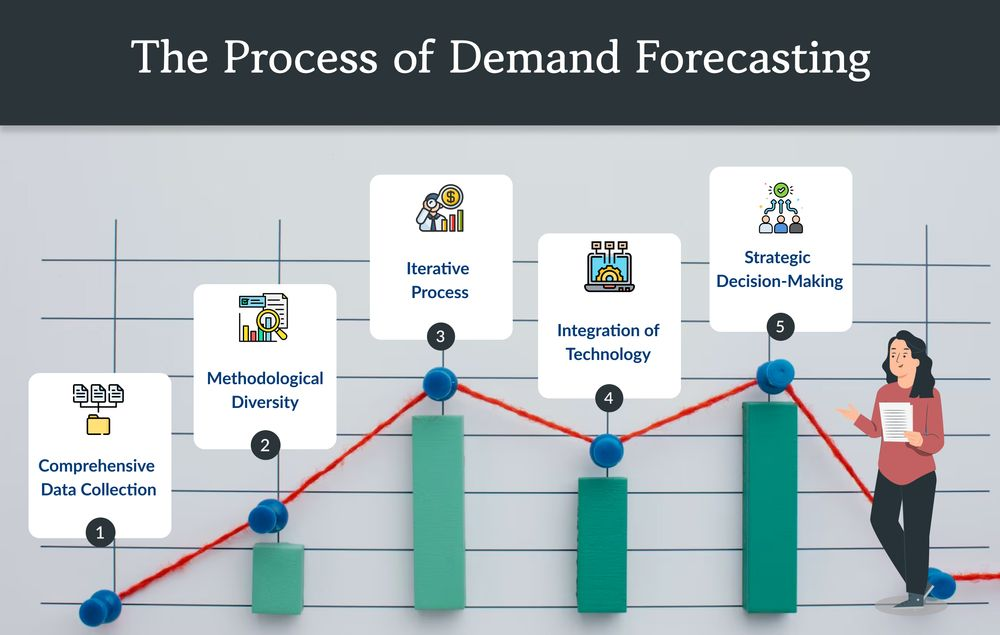

# Supply Chain Optimization with Demand Forecasting

## Project Overview
This project aims to optimize the supply chain by predicting weekly sales for various stores using a machine learning approach. We used RandomForestRegressor to model the sales data based on features such as store characteristics, promotions, and external factors. This project provides insights into the drivers of sales and helps in making data-driven decisions for optimizing inventory and supply chain operations.

## Objective
The objective of this project is to predict the `Weekly_Sales` for retail stores using historical data, including features such as promotions, store type, holidays, and seasonal factors. By developing a machine learning model, we aim to:

1. Provide accurate sales predictions for inventory management.
2. Analyze the importance of different features in predicting sales.
3. Visualize sales trends and key metrics to derive insights.

## Dataset
The project uses four datasets:

1. **Features.csv**: Contains additional information about the stores, such as promotional events and weather conditions.
2. **Stores.csv**: Contains store-related information, including store type and assortment type.
3. **Train.csv**: Historical sales data for training the model, including `Weekly_Sales` for each store.
4. **Test.csv**: Test data for evaluating the model.

## Step-by-Step Process

### Step 1: Data Loading
Loaded the datasets using Pandas and merged them to create a unified dataset containing all the relevant information for each store and date.

### Step 2: Data Preprocessing
- **Merging Datasets**: Merged the `features`, `stores`, and `train` datasets.
- **Handling Missing Values**: Filled missing values for numeric columns with their median and for categorical columns with their mode.
- **Feature Engineering**: Extracted features such as `Year`, `Month`, `Week`, `Day`, and `DayOfWeek` from the `Date` column for better analysis.
- **Encoding Categorical Variables**: One-hot encoded categorical variables to make them suitable for machine learning models.

### Step 3: Model Training
Used the **RandomForestRegressor** from scikit-learn to train the model on the processed data. The model was trained to predict the `Weekly_Sales` based on various features.

### Step 4: Model Evaluation
The model was evaluated using:
- **Mean Squared Error (MSE)**: To measure the average squared difference between actual and predicted sales.
- **R-squared (R²)**: To measure the proportion of variance explained by the model.

### Step 5: Feature Importance Analysis
We plotted the top 10 features that contributed most to the model's predictions, providing insights into the factors driving sales.

### Step 6: Visualizations
Used **Plotly** to enhance visualizations for deeper insights into sales trends and feature impacts. The visualizations include:
- **Sales Trend Over Time**: A line plot showing `Weekly_Sales` over the entire timeframe, which helps understand seasonal patterns and trends.
- **Sales Distribution by Store Type**: A boxplot depicting the distribution of sales by different store types to identify performance variations.

## Tools and Technologies
- **Python**: Core language used for analysis and modeling.
- **Pandas**: For data manipulation and preprocessing.
- **Scikit-Learn**: For machine learning modeling and evaluation.
- **Seaborn and Plotly**: For data visualization.
- **Matplotlib**: For plotting basic visualizations.

## Results
- **Mean Squared Error (MSE)**: The error metric used to measure the average squared difference between predicted and actual sales.
- **R-squared (R²)**: Indicates how well the features explain the variance in sales.

The model achieved reasonable accuracy in predicting weekly sales, with the feature importance analysis highlighting key drivers of sales such as promotions, store type, and seasonal factors.

## Future Work
- **Hyperparameter Tuning**: Improve the model by tuning hyperparameters of the RandomForestRegressor.
- **Additional Features**: Incorporate external data like economic indicators or regional events to improve model accuracy.
- **Optimization**: Use optimization techniques to enhance supply chain management based on sales predictions.hts.

In [95]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
features = pd.read_csv('features.csv')
features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [5]:
stores = pd.read_csv('stores.csv')
stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [7]:
train = pd.read_csv('train.csv')
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


In [15]:
train['Store'].nunique()

45

In [19]:
len(train['Store'])

421570

In [21]:
len(stores['Store'])

45

In [17]:
stores['Store'].nunique()

45

In [9]:
test = pd.read_csv('test.csv')
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [11]:
data = train.merge(stores, how='left', on='Store')

In [13]:
data.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315


In [23]:
len(data['Store'])

421570

In [25]:
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
dtype: int64

In [27]:
features['Store'].nunique()

45

In [29]:
len(features['Store'])

8190

In [31]:
features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [37]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size'], dtype='object')

In [33]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [35]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [39]:
data = data.merge(features, how='left', on=['Store', 'Date'])

In [41]:
len(data)

421570

In [43]:
data.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [47]:
data['Date'] = pd.to_datetime(data['Date'])

In [51]:
data = data.sort_values(by='Date')

In [53]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
277665,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False
277808,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False
277951,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False
278094,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False


In [55]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
379648,40,87,2012-10-26,24638.96,False,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,False
181170,19,30,2012-10-26,3740.12,False,A,203819,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992,False
181313,19,31,2012-10-26,3128.17,False,A,203819,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992,False
181599,19,33,2012-10-26,5740.14,False,A,203819,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992,False
421569,45,98,2012-10-26,1076.80,False,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False


In [57]:
data.isnull().sum().sum()

1422431

In [63]:
data.isnull().sum()/len(data)*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday_x      0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
IsHoliday_y      0.000000
dtype: float64

In [61]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
numerical_columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment'],
      dtype='object')

In [67]:
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

In [75]:
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64

In [73]:
data = data.fillna(data.mode().iloc[0])

In [77]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Week'] = data['Date'].dt.isocalendar().week
data['DayOfWeek'] = data['Date'].dt.dayofweek

In [79]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Year,Month,Day,Week,DayOfWeek
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,5347.45,...,1481.31,3359.45,211.096358,8.106,False,2010,2,5,5,4
277665,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,5347.45,...,1481.31,3359.45,131.527903,10.064,False,2010,2,5,5,4
277808,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,5347.45,...,1481.31,3359.45,131.527903,10.064,False,2010,2,5,5,4
277951,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,5347.45,...,1481.31,3359.45,131.527903,10.064,False,2010,2,5,5,4
278094,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,5347.45,...,1481.31,3359.45,131.527903,10.064,False,2010,2,5,5,4


In [81]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Type'], dtype='object')

In [83]:
if len(categorical_columns) >0:
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [85]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,IsHoliday_y,Year,Month,Day,Week,DayOfWeek,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,151315,42.31,2.572,5347.45,192.0,...,211.096358,8.106,False,2010,2,5,5,4,False,False
277665,29,5,2010-02-05,15552.08,False,93638,24.36,2.788,5347.45,192.0,...,131.527903,10.064,False,2010,2,5,5,4,True,False
277808,29,6,2010-02-05,3200.22,False,93638,24.36,2.788,5347.45,192.0,...,131.527903,10.064,False,2010,2,5,5,4,True,False
277951,29,7,2010-02-05,10820.05,False,93638,24.36,2.788,5347.45,192.0,...,131.527903,10.064,False,2010,2,5,5,4,True,False
278094,29,8,2010-02-05,20055.64,False,93638,24.36,2.788,5347.45,192.0,...,131.527903,10.064,False,2010,2,5,5,4,True,False


In [89]:
x = data.drop(columns = ['Date', 'Weekly_Sales'])
y = data['Weekly_Sales']

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [99]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [101]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error : {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error : 471988613.8573941
R-Squared: 0.09233091599074583


In [ ]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error : {mse}")
print(f"R-Squared: {r2}")

In [ ]:
RandomForestRegressor()